<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/DisasterNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [211]:
df = pd.read_csv('/content/sample_data/train.csv', index_col='id')

In [212]:
df.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [213]:
df.fillna('', inplace=True)

In [214]:
df.head()

,keyword,location,text,target
id,,,,
1,,,Our Deeds are the Reason of this #earthquake M...,1
4,,,Forest fire near La Ronge Sask. Canada,1
5,,,All residents asked to 'shelter in place' are ...,1
6,,,"13,000 people receive #wildfires evacuation or...",1
7,,,Just got sent this photo from Ruby #Alaska as ...,1


In [215]:
# useless alerts
df[df['target'] == 0].head()

,keyword,location,text,target
id,,,,
23,,,What's up man?,0
24,,,I love fruits,0
25,,,Summer is lovely,0
26,,,My car is so fast,0
28,,,What a goooooooaaaaaal!!!!!!,0


In [216]:
df['keyword'].nunique()

222

In [217]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [218]:
train, test = train_test_split(df, test_size=0.4)

In [219]:
train.shape

(4567, 4)

In [220]:
test.shape

(3046, 4)

In [221]:
X_train = train
y_train = train['target']

In [222]:
X_test = test.drop('target', axis=1)
y_test = test['target']

In [223]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4567, 4)
(4567,)
(3046, 3)
(3046,)


In [224]:
X_train.head()

,keyword,location,text,target
id,,,,
9211,suicide%20bombing,,Remembering Rebecca Roga 40 of the Philippines...,1
6017,hazardous,,Caution: breathing may be hazardous to your he...,0
823,battle,USA,Black Eye 9: A space battle occurred at Star O...,0
1236,blood,"???????, ??'??????",Blood Group A +ve is associated with Gastric ...,0
3172,deluge,518,@theburnageblue yes man i was having a bad wee...,0


In [225]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [226]:
sentence_example = X_train.iloc[0]["text"]
tokens = word_tokenize(sentence_example, language="russian")
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
russian_stop_words = stopwords.words("russian")
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
snowball = SnowballStemmer(language="russian")
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]

In [227]:
print(f"text: {sentence_example}")
print("-----------------")
print(f"tokens: {tokens}")
print("-----------------")
print(f"tokens no punctuation: {tokens_without_punctuation}")
print("-----------------")
print(f"tokens no punctuation and no stopwords: {tokens_without_stop_words_and_punctuation}")
print("-----------------")
print(f"tokens after stemming: {stemmed_tokens}")
print("-----------------")

text: Remembering Rebecca Roga 40 of the Philippines. murdered by Hamas terrorists in the suicide bombing of Egged bus No. 361
-----------------
tokens: ['Remembering', 'Rebecca', 'Roga', '40', 'of', 'the', 'Philippines', '.', 'murdered', 'by', 'Hamas', 'terrorists', 'in', 'the', 'suicide', 'bombing', 'of', 'Egged', 'bus', 'No', '.', '361']
-----------------
tokens no punctuation: ['Remembering', 'Rebecca', 'Roga', '40', 'of', 'the', 'Philippines', 'murdered', 'by', 'Hamas', 'terrorists', 'in', 'the', 'suicide', 'bombing', 'of', 'Egged', 'bus', 'No', '361']
-----------------
tokens no punctuation and no stopwords: ['Remembering', 'Rebecca', 'Roga', '40', 'of', 'the', 'Philippines', 'murdered', 'by', 'Hamas', 'terrorists', 'in', 'the', 'suicide', 'bombing', 'of', 'Egged', 'bus', 'No', '361']
-----------------
tokens after stemming: ['Remembering', 'Rebecca', 'Roga', '40', 'of', 'the', 'Philippines', 'murdered', 'by', 'Hamas', 'terrorists', 'in', 'the', 'suicide', 'bombing', 'of', 'Egged

In [228]:
snowball = SnowballStemmer(language="russian")
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i).lower() for i in tokens]
    return tokens

In [229]:
tokenize_sentence(X_train.iloc[0]["text"])

['remembering',
 'rebecca',
 'roga',
 '40',
 'of',
 'the',
 'philippines',
 'murdered',
 'by',
 'hamas',
 'terrorists',
 'in',
 'the',
 'suicide',
 'bombing',
 'of',
 'egged',
 'bus',
 'no',
 '361']

In [230]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

In [231]:
features = vectorizer.fit_transform(X_train["text"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [232]:
model = LogisticRegression(random_state=0)
model.fit(features, X_train["target"])

LogisticRegression(random_state=0)

In [233]:
model.predict(features[0])

array([1])

In [234]:
X_train["text"].iloc[0]

'Remembering Rebecca Roga 40 of the Philippines. murdered by Hamas terrorists in the suicide bombing of Egged bus No. 361'

In [235]:
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
]
)

In [236]:
model_pipeline.fit(X_train["text"], X_train["target"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7f565fafb520>)),
                ('model', LogisticRegression(random_state=0))])

In [237]:
# useless
model_pipeline.predict(["Hey yoo!"])

array([0])

In [238]:
# usefull
model_pipeline.predict(["Robbery on linkoln street"])

array([1])

In [248]:
# trolling
model_pipeline.predict(["Robbery on linkoln street. Burglar has stolen sex dolls from your mom's house!"])

array([0])

In [241]:
model_pipeline.predict(["Group of people cook crystal meth in the desert of New Mexico, ABQ, they use RV as a lab, and it's two of them, a bald person and young teenager"])

array([1])

In [250]:
model_pipeline.predict(["I guess one Hacker of the Hacker group 'fsociety' that hacked 'E corp' recently,\
                        lives in neighboring apartment, I've seen him arrested for stealing dog,\
                        but I know that he has hacked one person already, this criminal is short with pale skin and dark hair"])

array([0])

In [247]:
model_pipeline.predict(['Fire in the hall!!!'])

array([1])

In [ ]:
# it's so fun!

# **I AM NOT A GOOD PROGRAMMER BUT I AGREE:**

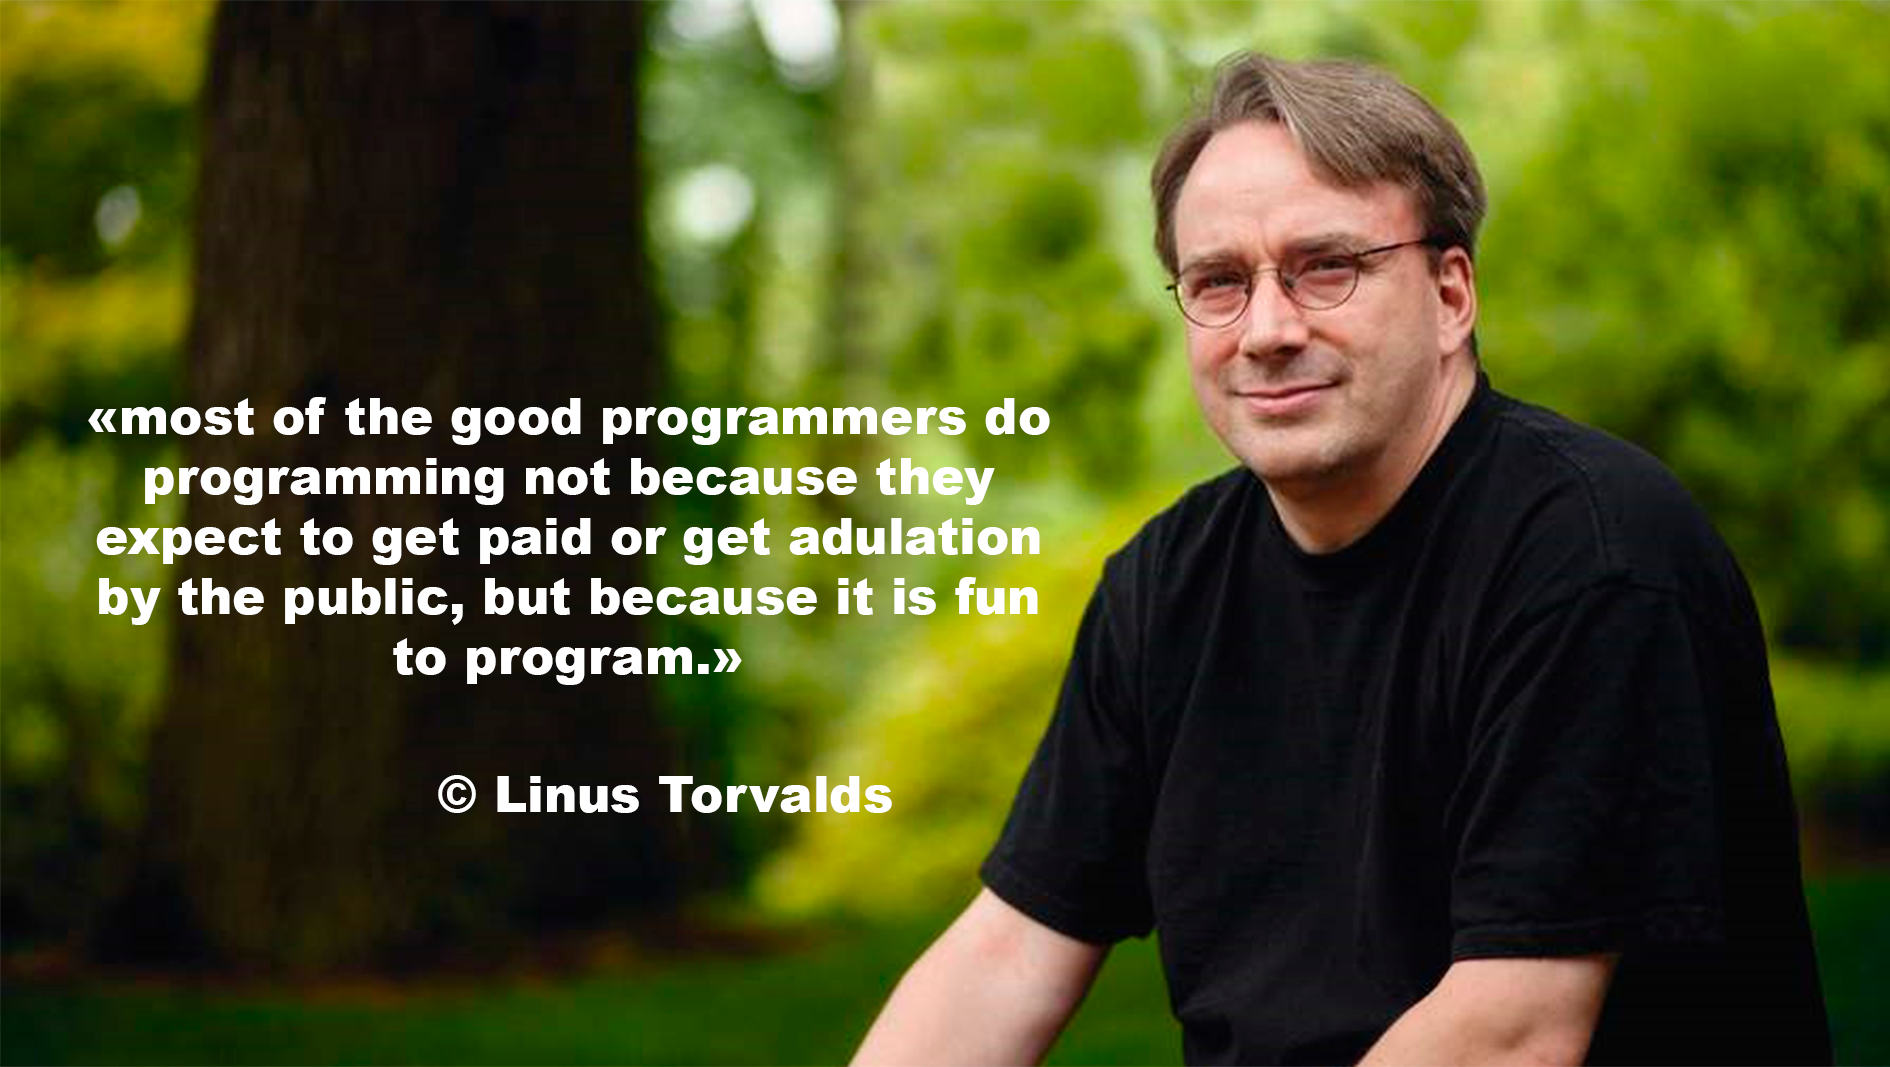